In [ ]:
 #importing libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving Login.csv to Login.csv


In [ ]:
# Get the data
log = pd.read_csv("Login.csv")

In [ ]:
# Twitter Api Credentials
consumerKey = "Your Consumer Key"
consumerSecret = "Your Consumer Secret Key"
accessToken = "Access Token"
accessTokenSecret = "Access Token Secret"

In [ ]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="BillGates", count = 100, lang ="en", tweet_mode="extended")
 
#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) “Time” is a poetic portrait of a family who love and support each other despite their difficult circumstances. I can’t recommend it highly enough. https://t.co/pxkDEmL2SR

2) If “Time” wins the Oscar this year, it will be the first documentary directed by a Black woman to do so. Garrett Bradley’s talent makes her worthy of that milestone. This is one of the most intimate movies I have ever seen. #itsTIME https://t.co/37x1gfWZgZ

3) Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that. https://t.co/VIaM9385bv

4) RT @gavi: In February, Ghana became the first African country to receive vaccines through #COVAX. Meet one of the nurses spearheading the v…

5) To get to net-zero emissions globally by 2050, leaders from around the world must work together. It’s encouraging to see governments

In [ ]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,“Time” is a poetic portrait of a family who lo...
1,"If “Time” wins the Oscar this year, it will be..."
2,Communities of color have been hit hard by COV...
3,"RT @gavi: In February, Ghana became the first ..."
4,"To get to net-zero emissions globally by 2050,..."


In [ ]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text
 
 
# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)
 
# Show the cleaned tweets
df

,Tweets
0,“Time” is a poetic portrait of a family who lo...
1,"If “Time” wins the Oscar this year, it will be..."
2,Communities of color have been hit hard by COV...
3,": In February, Ghana became the first African ..."
4,"To get to net-zero emissions globally by 2050,..."
...,...
95,": Since 2000, the malaria community has worked..."
96,"Thanks for the great conversation, Carlos."
97,: We must ensure these innovations reach every...
98,Bill Foege and Viktor Zdanov are phenomenal ex...


In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
 
# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity
 
 
# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
 
# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,“Time” is a poetic portrait of a family who lo...,0.645000,0.050000
1,"If “Time” wins the Oscar this year, it will be...",0.438095,0.202381
2,Communities of color have been hit hard by COV...,0.275000,-0.151667
3,": In February, Ghana became the first African ...",0.166667,0.125000
4,"To get to net-zero emissions globally by 2050,...",0.237500,0.187500
...,...,...,...
95,": Since 2000, the malaria community has worked...",0.000000,0.000000
96,"Thanks for the great conversation, Carlos.",0.475000,0.500000
97,: We must ensure these innovations reach every...,0.000000,0.000000
98,Bill Foege and Viktor Zdanov are phenomenal ex...,0.250000,0.250000


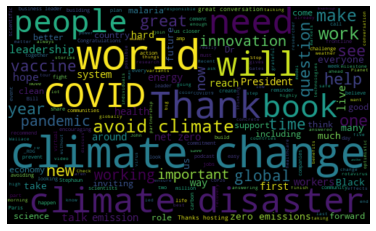

In [ ]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
 
 
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,“Time” is a poetic portrait of a family who lo...,0.645000,0.050000,Positive
1,"If “Time” wins the Oscar this year, it will be...",0.438095,0.202381,Positive
2,Communities of color have been hit hard by COV...,0.275000,-0.151667,Negative
3,": In February, Ghana became the first African ...",0.166667,0.125000,Positive
4,"To get to net-zero emissions globally by 2050,...",0.237500,0.187500,Positive
...,...,...,...,...
95,": Since 2000, the malaria community has worked...",0.000000,0.000000,Neutral
96,"Thanks for the great conversation, Carlos.",0.475000,0.500000,Positive
97,: We must ensure these innovations reach every...,0.000000,0.000000,Neutral
98,Bill Foege and Viktor Zdanov are phenomenal ex...,0.250000,0.250000,Positive


In [ ]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) “Time” is a poetic portrait of a family who love and support each other despite their difficult circumstances. I can’t recommend it highly enough. 

2) If “Time” wins the Oscar this year, it will be the first documentary directed by a Black woman to do so. Garrett Bradley’s talent makes her worthy of that milestone. This is one of the most intimate movies I have ever seen. itsTIME 

3) : In February, Ghana became the first African country to receive vaccines through COVAX. Meet one of the nurses spearheading the v…

4) To get to net-zero emissions globally by 2050, leaders from around the world must work together. It’s encouraging to see governments, business leaders, and financial institutions committing to a successful COP26 in Glasgow later this year. 

5) The amount of cement China has consumed is a staggering statistic and reminder of how much emissions have grown in low- and middle-income countries. (Minecraft concrete doesn’t count, though server fa

In [ ]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that. 

2) Dr. Stephaun Wallace () has spent the last year helping make COVID-19 vaccines work for everybody. Stephaun and his colleagues at  are working to reach the people who are usually left behind. 

3) It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects:  

4) : Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

5) For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines to prevent suffering and save lives. 

6) : Black folks have 

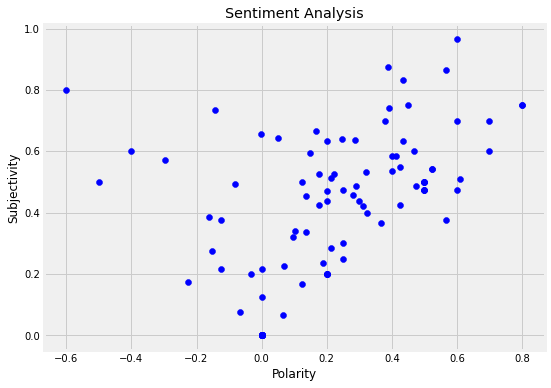

In [ ]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [ ]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive'] 
ptweets = ptweets['Tweets']
ptweets
 
round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

69.0

In [ ]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets
 
round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

14.0

In [ ]:
# Show the value counts
df['Analysis'].value_counts()

Positive    69
Neutral     17
Negative    14
Name: Analysis, dtype: int64

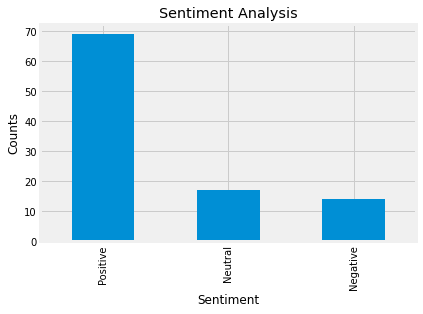

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts') 
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

***Thank You!***